# __Enhancing Customer Insights: Predictive Analysis of Spending Patterns Across Digital Platforms__

## __Project Overview__

#### __This project examines customer spending behavior through an analysis of a dataset that encompasses yearly expenditures across digital platforms, including both a website and a mobile app, alongside customer membership duration. The primary goal is to predict future spending patterns, offering insights that can support strategic decision-making for optimizing digital experiences. Ultimately, the findings will help inform potential areas of focus for enhancing customer engagement and maximizing spending.__

#### __In this project, we utilize a dataset ([available on Kaggle](https://www.kaggle.com/datasets/iyadavvaibhav/ecommerce-customer-device-usage)), which contains valuable information about customers of an e-commerce platform. The dataset includes metrics such as:__

- __Average Session Length:__ The average duration of in-store style advice sessions.
- __Time on App:__ The average time customers spend on the mobile app, measured in minutes.
- __Time on Website:__ The average time spent on the website, also measured in minutes.
- __Length of Membership:__ The duration of each customer’s membership in years.

#### __Import the required libraries__

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#### __Read the file to get an overview__

In [7]:
file="Ecommerce Customers.csv"
df=pd.read_csv(file)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### __Check for "null" values and duplicate rows__

In [12]:
print(df.info())
print(df.isna().any().any())
print(df.duplicated().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None
False
False


#### __Get a complete overview of the dataset__

In [13]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
df_numeric = df.select_dtypes(include='number')
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


## __Exploratory Data Analysis__
#### __Only four numerical columns are there and all other non-numerical columns doesnt seems to effect the "Yearly Amount Spent"; SO, let's take a look into the relationship between the numerical columns and "Yearly Amount Spent__"

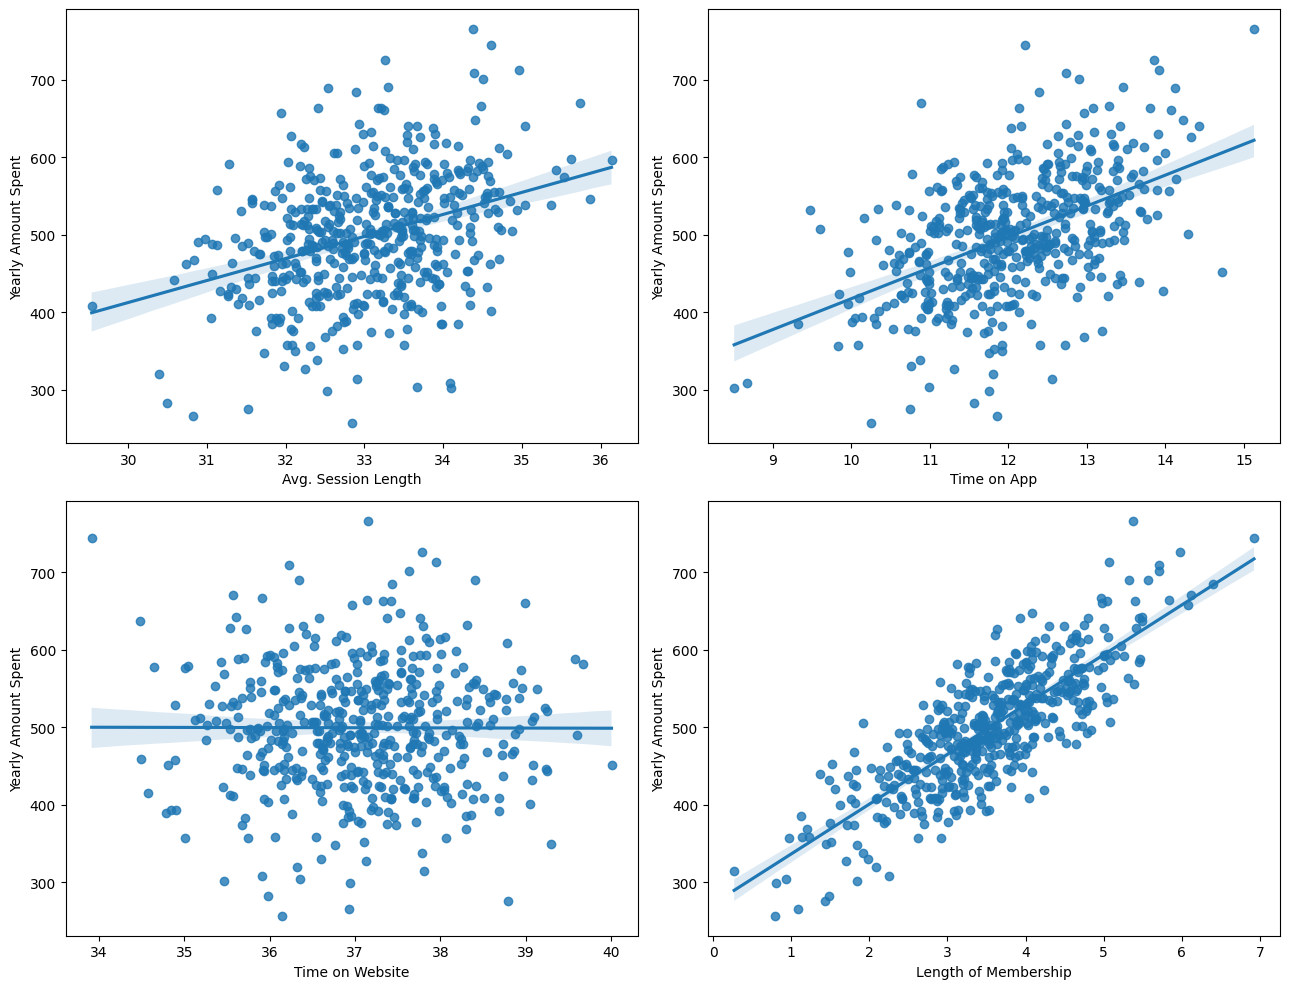

In [17]:
numericals=df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
plt.figure(figsize=(13, 10))
for i, column in enumerate(numericals1.columns):
    plt.subplot(2, 2, i + 1)  # Create subplots
    sns.regplot(x=column, y="Yearly Amount Spent", data=df)
plt.tight_layout()
plt.show()

#### __The data points for "Time on Website" column seems to have no reletionship with "Yearly Amount Spent". So, lets check the correlation.__  

In [18]:
df_numeric.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


#### __The correlation matrix shows very low value for "Time on Website" vs "Yearly Amount Spent" relationship. So, its better not include the column for our prediction model.__

In [19]:
df_numeric1=df_numeric.drop("Time on Website", axis=1)
df_numeric1.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


#### __Outlier detection and removal__

#### __It's important to check for outliers to prevent any type of errors in our model. So, let's draw a boxplot to have an idea of the location of the outliers in the dataset.__

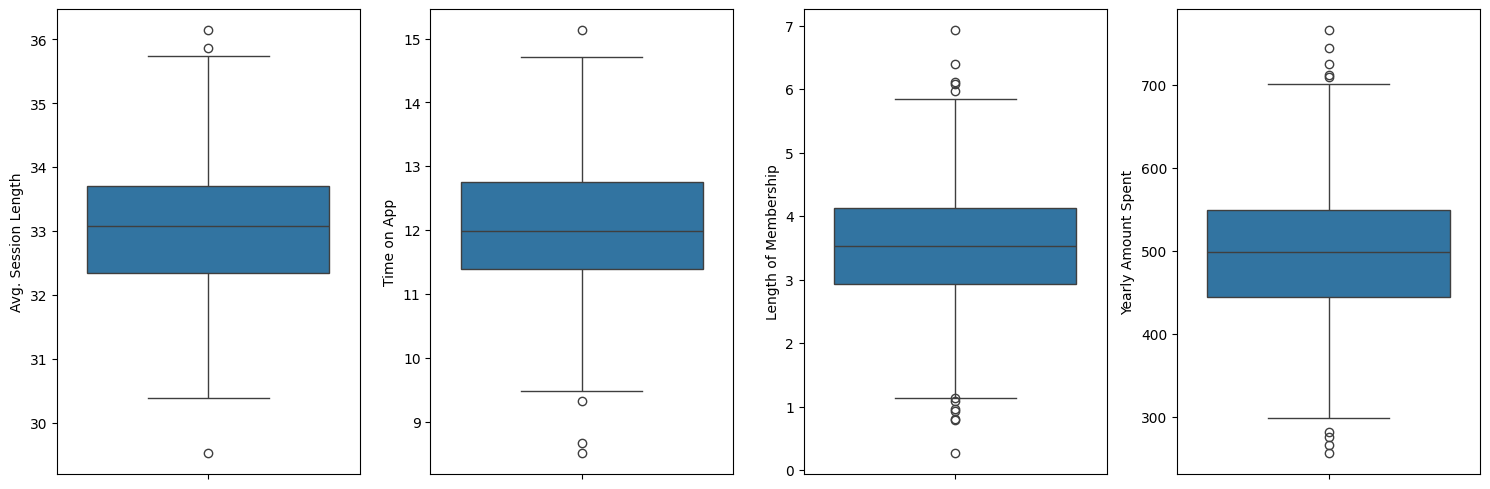

In [20]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(df_numeric1.columns):
    plt.subplot(1, len(df_numeric1.columns), i + 1)  # Create subplots
    sns.boxplot(df_numeric1[column])
plt.tight_layout()
plt.show()

#### __We can observe some outliers in the boxplot. its better to remove those but there is a chance that these points are not otliers but instead these are some extreme values.__

In [22]:
def detect_outliers_iqr(dataset):
    outliers=[]
    for column in dataset.columns:
        q1,q3=np.percentile(dataset[column], [25,75])
        iqr=q3-q1
        lower_fences=q1-(1.5*iqr)
        higher_fences=q3+(1.5*iqr)
        outlier_indices = dataset[(dataset[column] < lower_fences) | (dataset[column] > higher_fences)].index
        outliers.extend(outlier_indices)
    return set(outliers)

In [26]:
ds=detect_outliers_iqr(df_numeric1)
df_cleaned = df_numeric1.drop(index=ds)
df_cleaned

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...
495,33.237660,13.566160,3.746573,573.847438
496,34.702529,11.695736,3.576526,529.049004
497,32.646777,11.499409,4.958264,551.620145
498,33.322501,12.391423,2.336485,456.469510


#### __Let's check how much outliers we are able to remove from our datasets.__

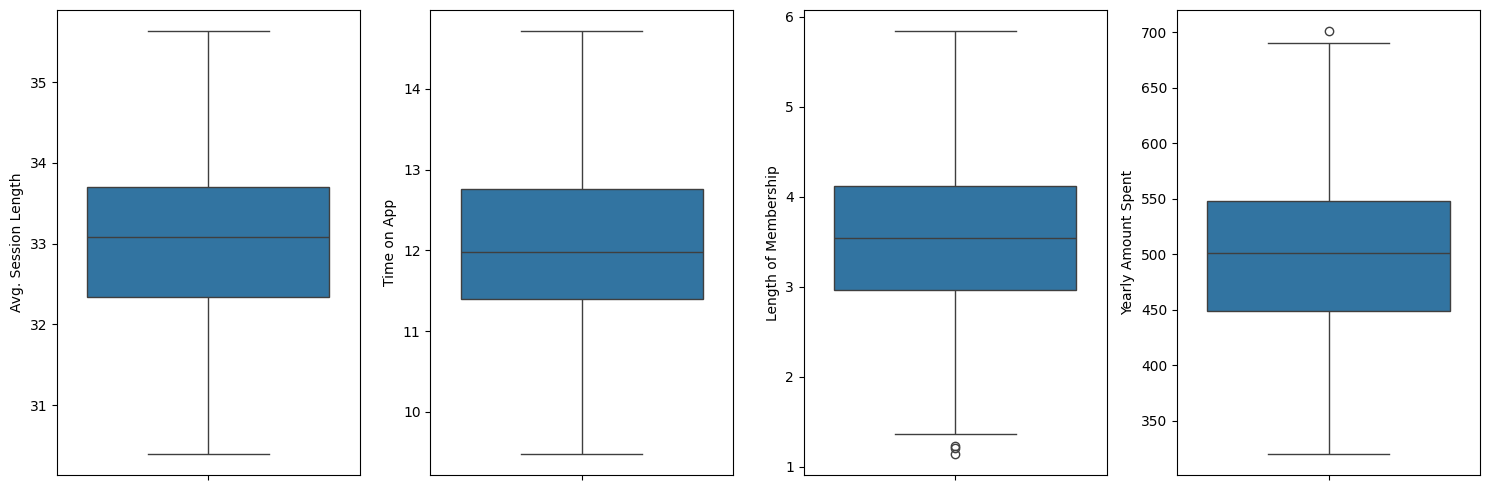

In [27]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(df_cleaned.columns):
    plt.subplot(1, len(df_cleaned.columns), i + 1)
    sns.boxplot(df_cleaned[column])
plt.tight_layout()
plt.show()

## __Regression model training__
#### __In this section, we have created a "Multiple Linear Regression" model with data points from our dataset using Scikit-Learn. This model will predict the response variable (predic) based on our dataset, utilizing the relationship of predictor variables (x i.e, "Avg. Session Length",	"Time on App" and	"Length of Membership") and response variable (y i.e, "Yearly Amount Spent") from our dataset. Our aim is to build a model that takes the values of x and predicts y using a linear regression method.__

In [28]:
x=df_cleaned.drop("Yearly Amount Spent", axis=1)
y=df_cleaned["Yearly Amount Spent"]
lm=LinearRegression()
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=5)
lm.fit(x_train,y_train)

LinearRegression()

In [29]:
print("The coefficients are", lm.coef_)
print("The intercept is", lm.intercept_)
print("The r square value is", lm.score(x,y))

The coefficients are [25.13429738 39.18604861 62.01448665]
The intercept is -1022.903383623399
The r square value is 0.979262699729864


## __Prediction using test data__

#### __With the model now trained, we can start making predictions and evaluating its accuracy.__

In [30]:
predic=lm.predict(x_test)
r2_score(y_test, predic)

0.9772628244468553

In [31]:
output=pd.DataFrame({"actual_price":y_test, "predicted_price":predic})
output.head()

,actual_price,predicted_price
499,497.778642,480.787650
142,463.923513,452.372025
237,376.336901,381.428867
380,527.783790,517.340097
125,541.226584,544.745675


#### __The scatter plot below shows the actual y values compared to the model's predictions. From this comparison, it looks like the model is performing well.__

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

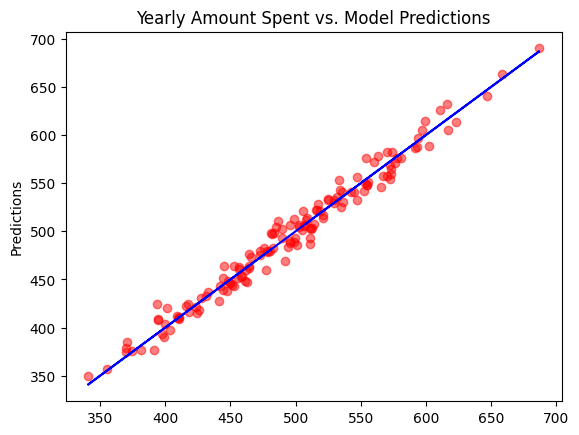

In [37]:
plt.scatter(x=predic, y=y_test, c='red', alpha=0.5)
plt.plot(predic, predic, color='blue')
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

## __Model evaluation__

#### __Now let's evaluate the model.__

In [32]:
print("Mean Absolute Error", mean_absolute_error(y_test, predic))
print("Mean Squared Error", mean_squared_error(y_test, predic))
print("Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, predic)))

Mean Absolute Error 8.192999501385838
Mean Squared Error 103.18055075267323
Root Mean Squared Error 10.157782767546923


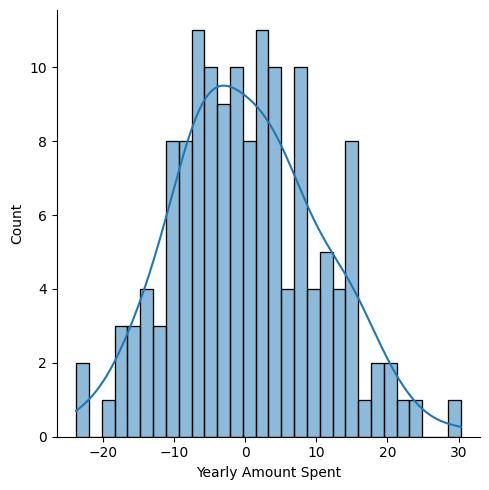

In [33]:
residuals = y_test-predic
sns.displot(residuals, bins=30, kde=True)

## __Conclusion__

#### __Interpreting the results of this analysis can be complex.__
- The model indicates that the key factor influencing clients' spending is their length of membership, rather than the time they spend on the app or website".

- Between the two predictors "Time on App" and	"Time on Website" the "Time on App" shows a significantly stronger effect on spending behavior.

- Notably, the time spent on the website appears to have no correlation with expenditure.

In summary, the data suggests that the duration of time customers engage with the website does not impact their overall spending.

From our analysis we can also assume that shoppers are more influenced by mobile apps than by websites and  we need to analyse the website to understand what making it a less choice then mobile app and what enhancements we can do to increase visitor purchases.